# Multi-class prediction problem          
### Problem Statement       
>>To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.          


In [1]:
# .....................Importing Important libraries for Classification Models................
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset from the csv file and using demiliter as ";"
df=pd.read_csv("cardio_train.csv",delimiter=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Data Analysis:            
>>### Features:                           
1.	Age | Objective Feature | age | int (days)                     
2.	Height | Objective Feature | height | int (cm) |              
3.	Weight | Objective Feature | weight | float (kg) |                       ?   
4.	Gender | Objective Feature | gender | categorical code |                       
5.	Systolic blood pressure | Examination Feature | ap_hi | int |                
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |              
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |          
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |                  
9.	Smoking | Subjective Feature | smoke | binary |                  
10.	Alcohol intake | Subjective Feature | alco | binary |                    
11.	Physical activity | Subjective Feature | active | binary |               

>>### Label:     
1.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |              

>> We need to predict whether theperson is suffering from Cardiovascular disease or not.

# EDA ( Exploratory Data Analysis)

In [3]:
# Printing first five rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
# Printing the shape of the dataset
print("Shape of the Dataset(Rows, Columns): ",df.shape)

Shape of the Dataset(Rows, Columns):  (69301, 13)


In [5]:
# Checking the null vakues if any......
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# Features information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
# Statistical information of the dataset.
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Checking the unique values....
for col in df.columns.values:
    print("Number of unique values of {} : {} ".format(col,df[col].nunique()))

Number of unique values of id : 69301 
Number of unique values of age : 8069 
Number of unique values of gender : 2 
Number of unique values of height : 108 
Number of unique values of weight : 285 
Number of unique values of ap_hi : 153 
Number of unique values of ap_lo : 157 
Number of unique values of cholesterol : 3 
Number of unique values of gluc : 3 
Number of unique values of smoke : 2 
Number of unique values of alco : 2 
Number of unique values of active : 2 
Number of unique values of cardio : 2 


In [9]:
# checking the correlation of the dataset features and label
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


## Univariant Plot Analysis

id                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
age             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
gender          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
height          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
weight            AxesSubplot(0.125,0.518913;0.168478x0.16413)
ap_hi          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
ap_lo          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
cholesterol    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
gluc              AxesSubplot(0.125,0.321957;0.168478x0.16413)
smoke          AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alco           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
active         AxesSubplot(0.731522,0.321957;0.168478x0.16413)
cardio               AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

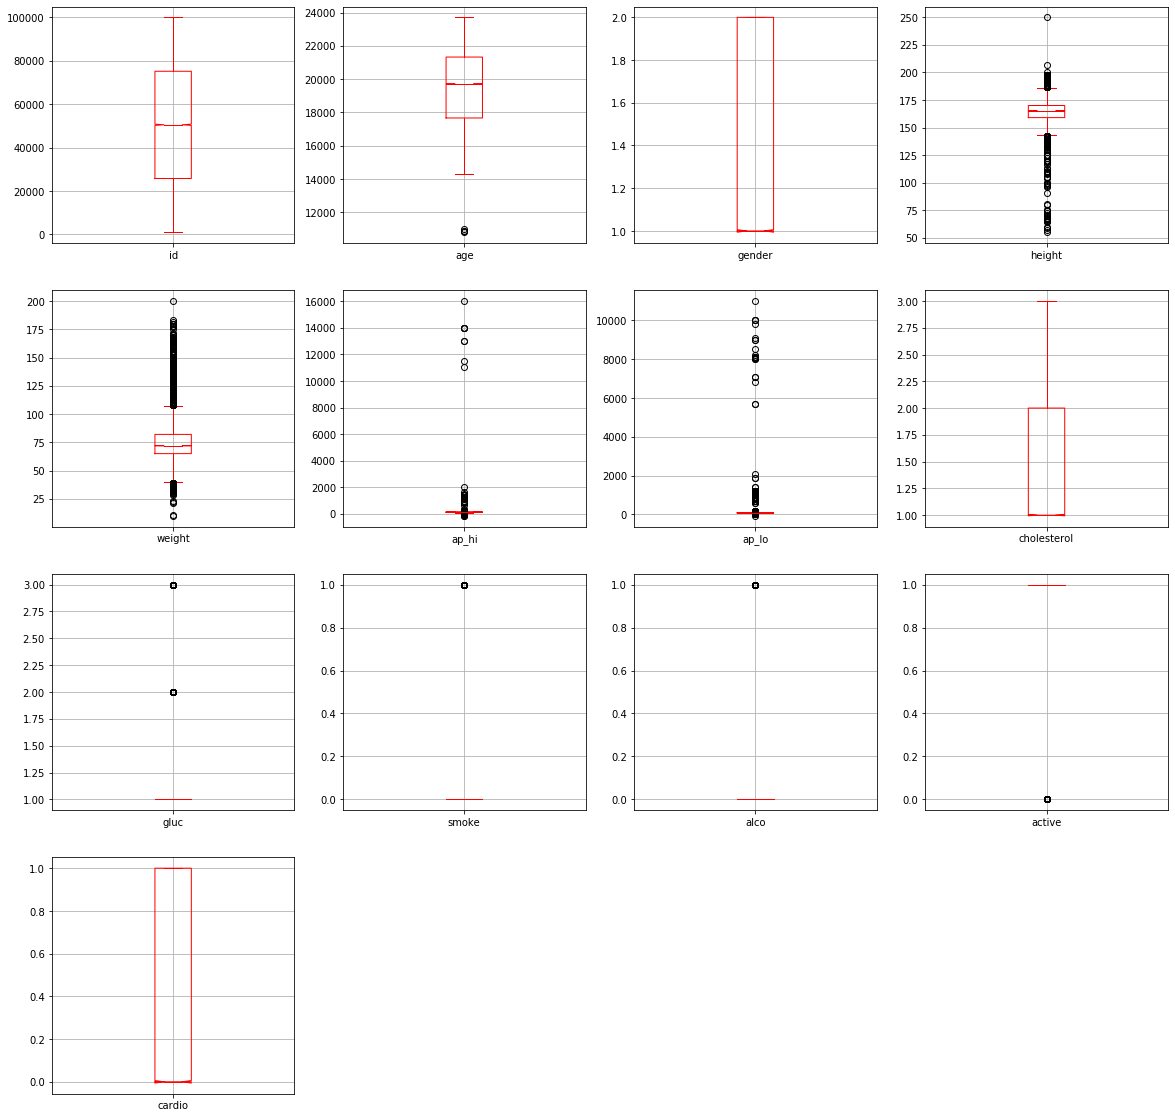

In [10]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(20,20),grid=True,notch=True,color='red' ,legend=True)

### Height, Weight, ap_lo and ap_hi do have lot of outliers in it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA72B8C588>,
      dtype=object)

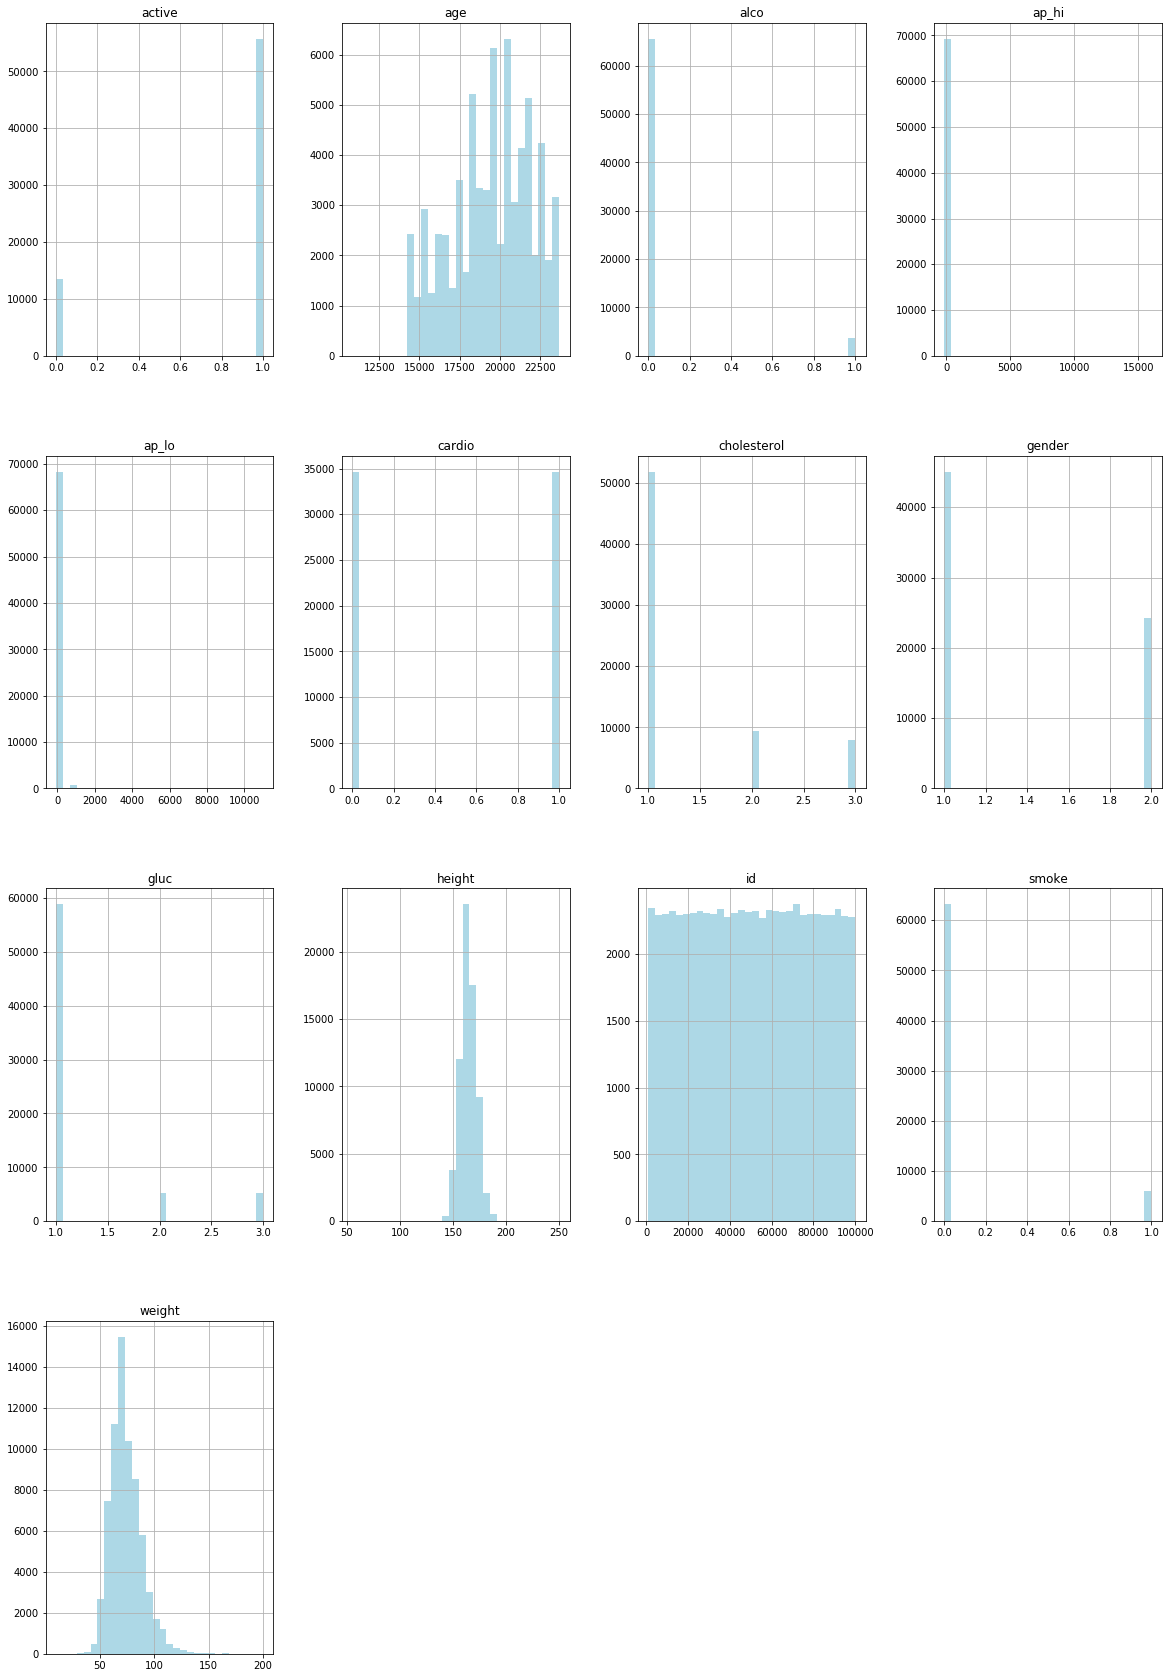

In [11]:
#Checking the Distribution using the histogram plot.
df.hist(figsize=(20,30),grid=True,layout=(4,4),bins=30,color='lightblue')

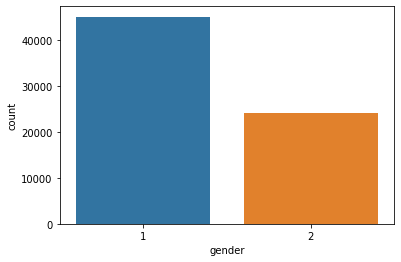

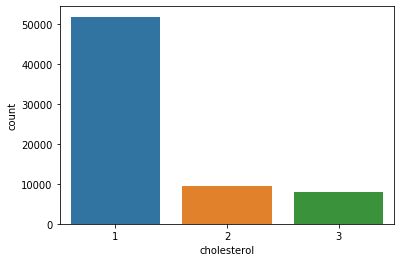

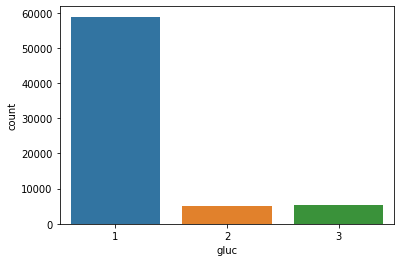

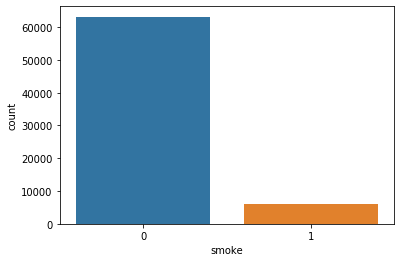

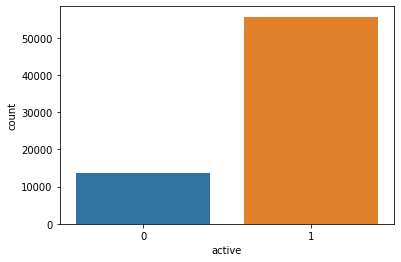

In [12]:
for i in ["gender","cholesterol","gluc","smoke","active"]:
    sns.countplot(i,data=df)
    plt.show()

### Conclusion:
>>1) gender 1 is more than gender 2.                  
>>2) Number of counts of person having cholesterol level in ascending order: 3 > 2 > 1 where,(1: normal, 2: above normal, 3: well above normal).              
>>3) Number of counts of person having glucose level in ascending order:2 > 3 > 1 where,(1: normal, 2: above normal, 3: well above normal).                    
>>4) Number of persons with more physical activity is more.
    

# Bivariant Analysis

In [13]:
# Printing the 25 and 75 percentile for height
q1=np.percentile(df.height,25)
q2=np.percentile(df.height,75)
IQR=q2-q1
lower=q1-(1.5*IQR)
upper=q2+(1.5*IQR)

print(q1)
print(q2)

159.0
170.0


In [14]:
# Printing the 25 and 75 percentile for Systolic Blood pressure
q1=np.percentile(df.weight,25)
q2=np.percentile(df.weight,75)
IQR=q2-q1
lower=q1-(1.5*IQR)
upper=q2+(1.5*IQR)

print(q1)
print(q2)

65.0
82.0


<Figure size 720x720 with 0 Axes>

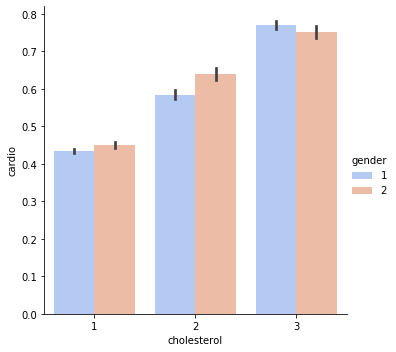

In [15]:
# Graph to show which gender have which type of cholesterol....
plt.figure(figsize=(10,10))
sns.catplot(x='cholesterol',y='cardio',data=df,kind='bar',hue='gender',palette='coolwarm')

Text(0.5, 1.0, 'Diastolic blood pressure VS Cardio')

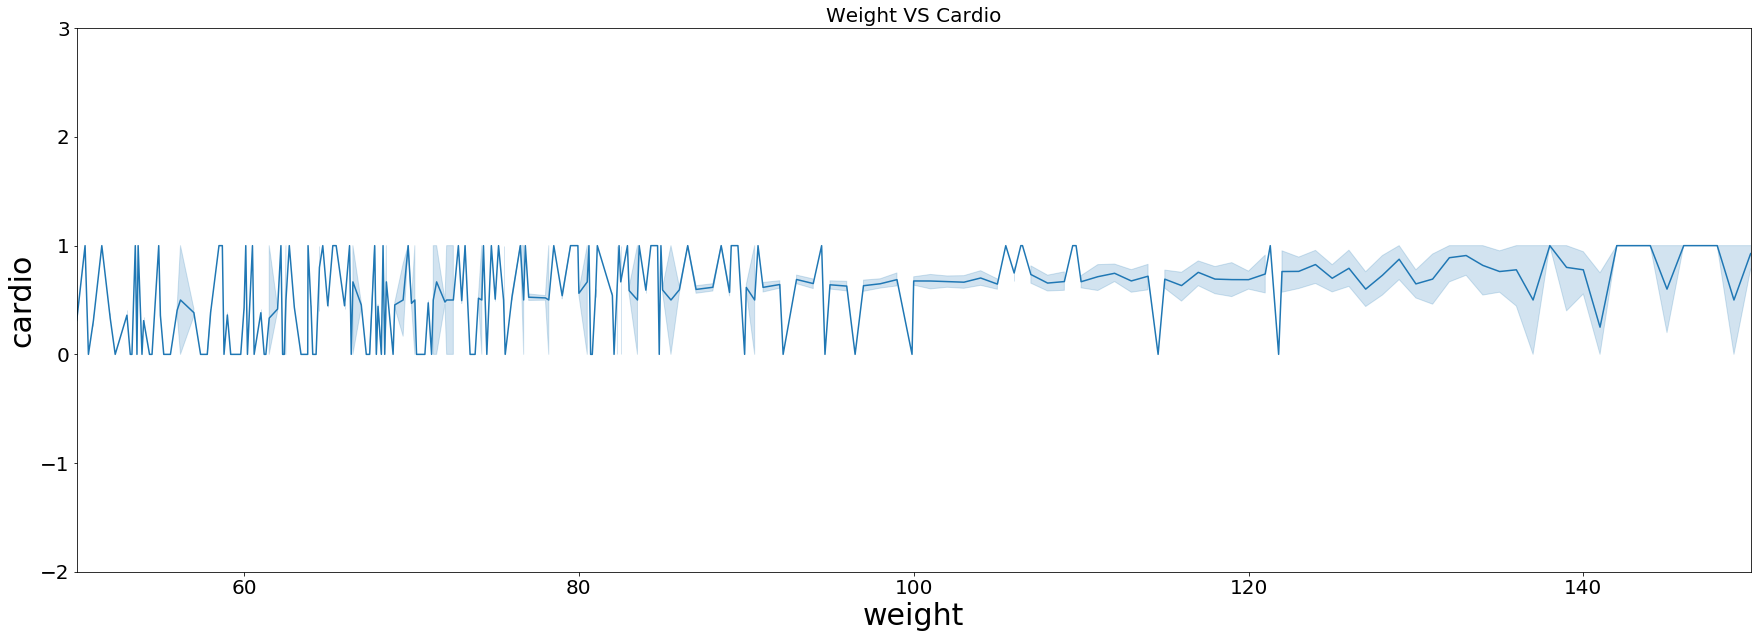

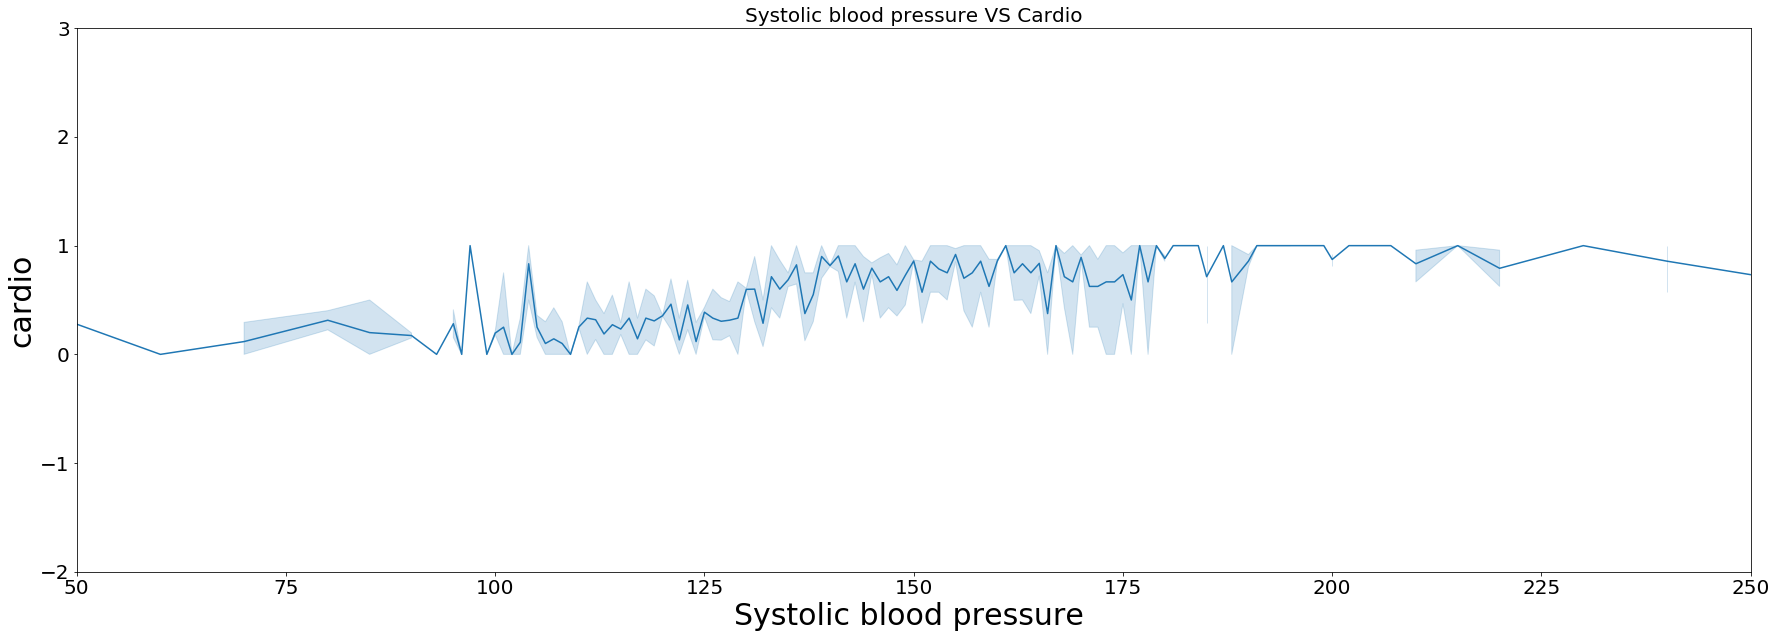

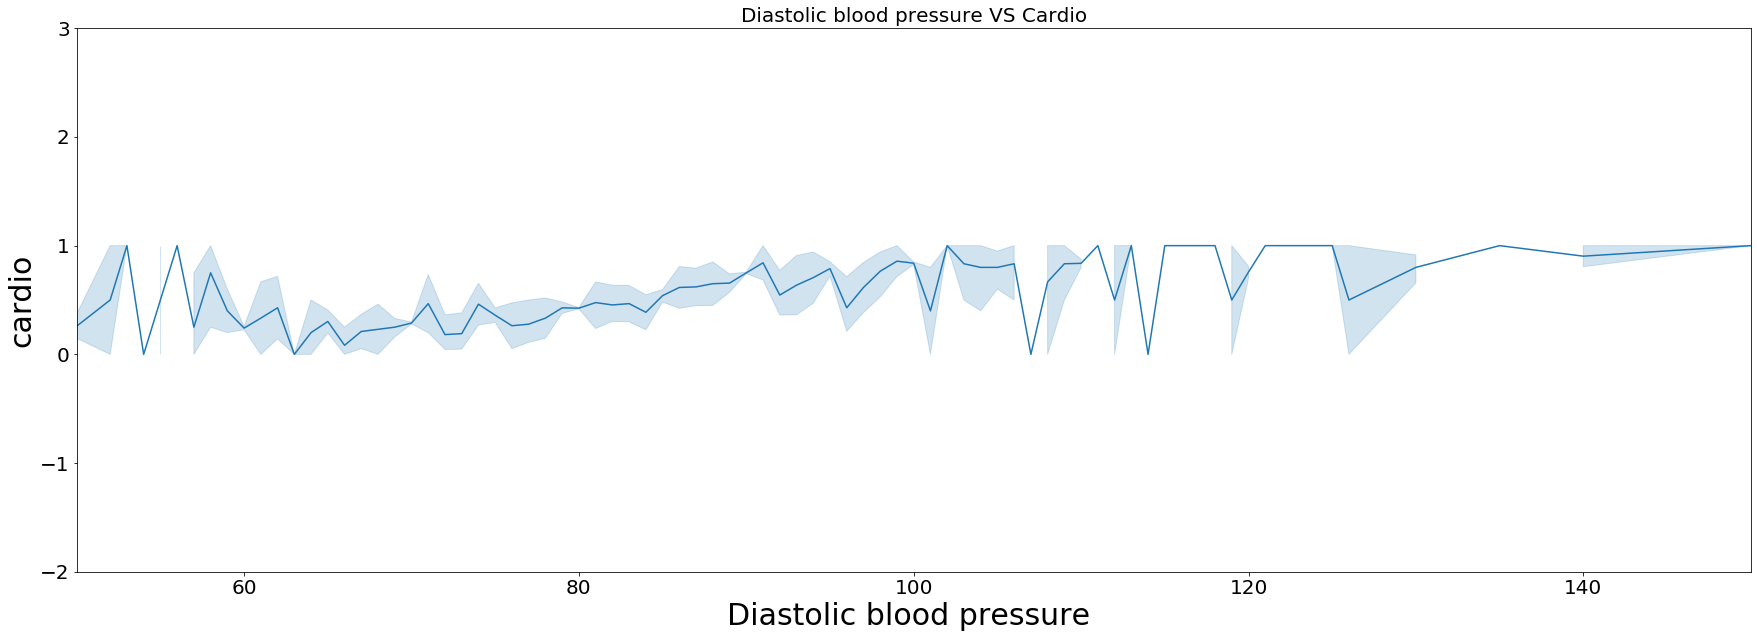

In [16]:
# Graph to show relationship between height,weight,Systolic and Diastolic bp with cardio....
plt.figure(figsize=(30,10))
sns.lineplot(x='weight',y='cardio',data=df,palette='coolwarm')
plt.ylim(-2,3)
plt.xlim(50,150)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('cardio',fontsize=30)
plt.xlabel('weight',fontsize=30)
plt.title("Weight VS Cardio",fontsize=20)

plt.figure(figsize=(30,10))
sns.lineplot(x='ap_hi',y='cardio',data=df,palette='husl')
plt.ylim(-2,3)
plt.xlim(50,250)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('cardio',fontsize=30)
plt.xlabel('Systolic blood pressure ',fontsize=30)
plt.title("Systolic blood pressure VS Cardio",fontsize=20)

plt.figure(figsize=(30,10))
sns.lineplot(x='ap_lo',y='cardio',data=df,palette='coolwrainbowarm')
plt.ylim(-2,3)
plt.xlim(50,150)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('cardio',fontsize=30)
plt.xlabel('Diastolic blood pressure ',fontsize=30)
plt.title("Diastolic blood pressure VS Cardio",fontsize=20)


### Conclusion for the above graphs       
>>1)Increasing weight leads to increase in chance of having cardiovascular disease .          
>>2)As value of Systolic Blood Pressure increse, cardiovascular disease  chance increases.

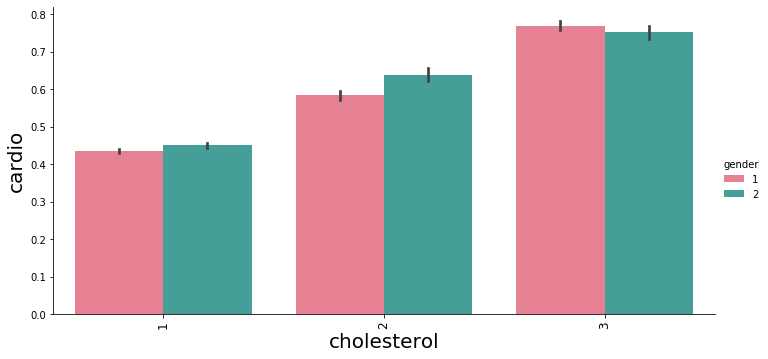

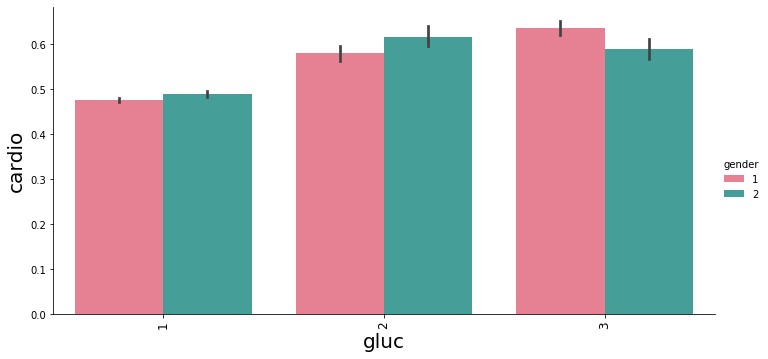

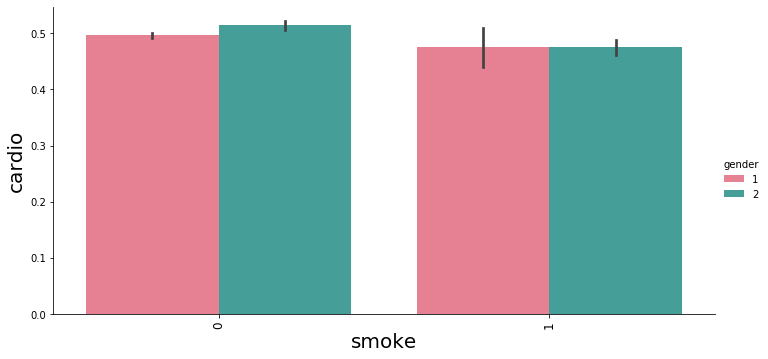

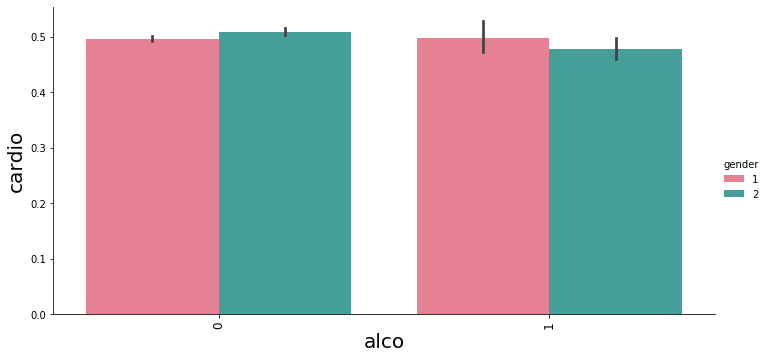

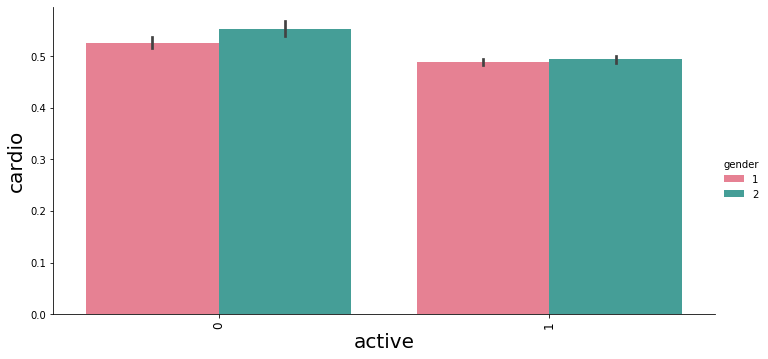

In [64]:
# for loop to plot graphs between cardio and different features of the dataset....

for i in ["cholesterol","gluc","smoke","alco","active"]:
   
    sns.catplot(x=i,
                data=df,
                y='cardio',
                palette='husl',
                height=5,
                aspect=2,
                hue='gender',
               kind='bar')
    
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('cardio',fontsize=20)
    plt.xlabel(i,fontsize=20)

### Conclusion from above graphs
>>1) Persons having cholesterol of level 3(well above normal) are more prone to cardiovascular disease.        
>>2) Persons having level 2(above normal) and level 3(well above normal) glucose are more prone to cardiovascular disease.   
>>3) Persons who smoke are more prone to cardiovascular disease.    
>>4) Persons having less physical activity are having more risk of cardiovascular disease.       

In [18]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1,0.0036,0.0038,-0.0037,-0.0015,0.0033,-0.0028,0.0064,0.0025,-0.0033,0.00038,0.0027,0.0043
age,0.0036,1,-0.023,-0.081,0.054,0.021,0.018,0.15,0.099,-0.048,-0.029,-0.0099,0.24
gender,0.0038,-0.023,1,0.5,0.16,0.006,0.015,-0.036,-0.021,0.34,0.17,0.0062,0.0086
height,-0.0037,-0.081,0.5,1,0.29,0.0055,0.0062,-0.051,-0.019,0.19,0.094,-0.006,-0.011
weight,-0.0015,0.054,0.16,0.29,1,0.031,0.044,0.14,0.11,0.068,0.067,-0.017,0.18
ap_hi,0.0033,0.021,0.006,0.0055,0.031,1,0.016,0.024,0.012,-0.00093,0.0014,3.2e-05,0.054
ap_lo,-0.0028,0.018,0.015,0.0062,0.044,0.016,1,0.024,0.011,0.0049,0.011,0.005,0.065
cholesterol,0.0064,0.15,-0.036,-0.051,0.14,0.024,0.024,1,0.45,0.01,0.036,0.0097,0.22
gluc,0.0025,0.099,-0.021,-0.019,0.11,0.012,0.011,0.45,1,-0.0046,0.011,-0.0073,0.089
smoke,-0.0033,-0.048,0.34,0.19,0.068,-0.00093,0.0049,0.01,-0.0046,1,0.34,0.026,-0.015


## Feature Engineering

In [19]:
# Dropping feature id and age.
df.drop(['id','age'],axis=1,inplace=True)

### Not much information is gained from this "id" feature and the age feature is full of outliers.....as age lies between "10798" and "23713" which can not be the age of a person anyhow.

In [20]:
# Making some new features for to make machine better understands the data
dfcholesterolDummies = pd.get_dummies(df['cholesterol'], prefix = 'cholesterol')
dfglucDummies = pd.get_dummies(df['gluc'], prefix = 'gluc')

In [21]:
#Dropping a columns
df.drop(['cholesterol','gluc'], axis=1, inplace=True)

df= pd.concat([df, dfcholesterolDummies], axis=1)
df= pd.concat([df, dfglucDummies], axis=1)

In [22]:
# Printing dataset
df

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,1,155,69.0,130,80,0,0,1,0,0,1,0,0,1,0
1,1,163,71.0,110,70,0,0,1,1,1,0,0,1,0,0
2,1,165,70.0,120,80,0,0,1,0,1,0,0,1,0,0
3,2,165,85.0,120,80,1,1,1,0,1,0,0,1,0,0
4,1,155,62.0,120,80,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,2,168,76.0,120,80,1,0,1,0,1,0,0,1,0,0
69297,1,158,126.0,140,90,0,0,1,1,0,1,0,0,1,0
69298,2,183,105.0,180,90,0,1,0,1,0,0,1,1,0,0
69299,1,163,72.0,135,80,0,0,0,1,1,0,0,0,1,0


In [23]:
# Checking null value
df.isnull().sum()

gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
smoke            0
alco             0
active           0
cardio           0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
gluc_1           0
gluc_2           0
gluc_3           0
dtype: int64

In [24]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(69301, 15)
(50959, 15)


In [25]:
# checking skewness
df_new.skew()

gender           0.892343
height           0.094419
weight           0.587019
ap_hi           -0.319936
ap_lo            5.177108
smoke            0.000000
alco             0.000000
active          -1.510324
cardio           0.093631
cholesterol_1   -1.732148
cholesterol_2    2.534755
cholesterol_3    3.522829
gluc_1           0.000000
gluc_2           0.000000
gluc_3           0.000000
dtype: float64

In [26]:
# Removing Skewness
for i in df_new.columns:
    if df_new.skew().loc[i]>0.55:
        df_new[i]=np.log1p(df[i])

In [27]:
# checking the skewness
df_new.skew()

gender           0.892343
height           0.094419
weight           0.068418
ap_hi           -0.319936
ap_lo           -8.658046
smoke            0.000000
alco             0.000000
active          -1.510324
cardio           0.093631
cholesterol_1   -1.732148
cholesterol_2    2.534755
cholesterol_3    3.522829
gluc_1           0.000000
gluc_2           0.000000
gluc_3           0.000000
dtype: float64

In [28]:
# Dropping null values
df_new.dropna(inplace=True)

In [29]:
# Checking for null values
df_new.isnull().sum()

gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
smoke            0
alco             0
active           0
cardio           0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
gluc_1           0
gluc_2           0
gluc_3           0
dtype: int64

In [30]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
gender,1,0.5,0.16,0.006,0.015,0.34,0.17,0.0062,0.0086,0.035,-0.017,-0.03,0.019,-0.0048,-0.02
height,0.5,1,0.29,0.0055,0.0062,0.19,0.094,-0.006,-0.011,0.049,-0.023,-0.041,0.02,-0.012,-0.014
weight,0.16,0.29,1,0.031,0.044,0.068,0.067,-0.017,0.18,-0.14,0.068,0.11,-0.12,0.095,0.069
ap_hi,0.006,0.0055,0.031,1,0.016,-0.00093,0.0014,3.2e-05,0.054,-0.025,0.015,0.017,-0.013,0.0093,0.0082
ap_lo,0.015,0.0062,0.044,0.016,1,0.0049,0.011,0.005,0.065,-0.026,0.019,0.015,-0.014,0.014,0.005
smoke,0.34,0.19,0.068,-0.00093,0.0049,1,0.34,0.026,-0.015,-0.018,0.025,-0.0024,-0.0023,0.016,-0.013
alco,0.17,0.094,0.067,0.0014,0.011,0.34,1,0.026,-0.0072,-0.044,0.039,0.017,-0.021,0.032,-0.0035
active,0.0062,-0.006,-0.017,3.2e-05,0.005,0.026,0.026,1,-0.036,-0.0058,-0.0046,0.013,0.0096,-0.01,-0.0028
cardio,0.0086,-0.011,0.18,0.054,0.065,-0.015,-0.0072,-0.036,1,-0.21,0.082,0.19,-0.091,0.053,0.07
cholesterol_1,0.035,0.049,-0.14,-0.025,-0.026,-0.018,-0.044,-0.0058,-0.21,1,-0.69,-0.62,0.38,-0.21,-0.31


In [31]:
# Dataset after removal of outliers and skewness
df_new

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
1,0.693147,163,4.276666,110,4.262680,0,0,1,1,1,0.000000,0.0,1,0,0
2,0.693147,165,4.262680,120,4.394449,0,0,1,0,1,0.000000,0.0,1,0,0
4,0.693147,155,4.143135,120,4.394449,0,0,1,0,1,0.000000,0.0,1,0,0
5,0.693147,164,4.127134,100,4.262680,0,0,1,0,1,0.000000,0.0,1,0,0
6,0.693147,162,4.290459,100,4.262680,0,0,1,0,1,0.000000,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69291,0.693147,168,4.290459,110,4.262680,0,0,1,1,1,0.000000,0.0,1,0,0
69293,0.693147,161,4.043051,170,4.510860,0,0,1,1,1,0.000000,0.0,1,0,0
69294,0.693147,172,4.262680,130,4.510860,0,0,1,1,1,0.000000,0.0,1,0,0
69295,0.693147,165,4.394449,150,4.394449,0,0,1,1,1,0.000000,0.0,1,0,0


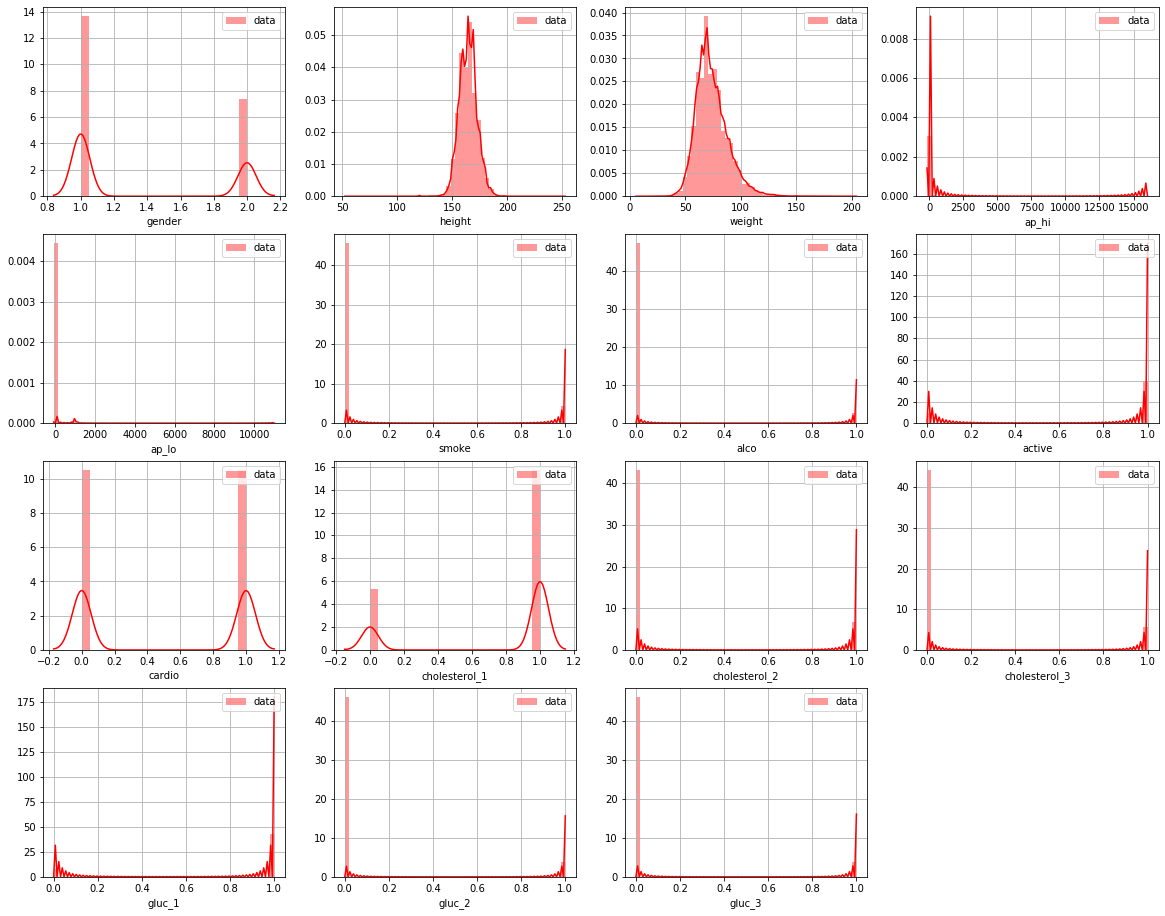

In [32]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [33]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['cardio'],axis=1)
x1
print(x1.shape)

(50958, 14)


In [34]:
# Setting up the Target value in variable y.
y=df_new['cardio']
y.shape

(50958,)

In [35]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,-0.648865,-0.126607,-0.039108,-0.873410,-0.954420,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
1,-0.648865,0.138636,-0.120328,-0.300651,-0.015803,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
2,-0.648865,-1.187578,-0.814544,-0.300651,-0.015803,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
3,-0.648865,0.006015,-0.907461,-1.446168,-0.954420,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
4,-0.648865,-0.259228,0.040992,-1.446168,-0.954420,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50953,-0.648865,0.536500,0.040992,-0.873410,-0.954420,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
50954,-0.648865,-0.391850,-1.395743,2.563139,0.813410,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
50955,-0.648865,1.066986,-0.120328,0.272107,0.813410,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0
50956,-0.648865,0.138636,0.644875,1.417623,-0.015803,0.0,0.0,0.497957,0.456848,-0.347021,-0.264078,0.0,0.0,0.0


# Hyper Parameter Tuning

### #In this step I am doing Hyper parameter tuning so that i can find out the best parameters and based on these parameters setting up models for training..

In [36]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [37]:
#.........Grid Search for DecisionTreeClassifier......
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy')

{'criterion': 'entropy', 'max_depth': 4, 'random_state': 1}


In [38]:
#.......Grid Search for GradientBoostingClassifier......
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy')

{'learning_rate': 0.1, 'n_estimators': 100}


In [39]:
#.......Grid Search for KNeighborsClassifier.......
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy')

{'n_neighbors': 22}


In [40]:
#........Grid Search for LogisticRegression....
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy')

{'C': 0.1}


In [41]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,1000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy')

{'max_features': 'auto', 'n_estimators': 500}


In [42]:
#.....Grid Search for AdaBoostClassifier......
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy')

{'n_estimators': 700}


# Model Training

In [43]:
#........Defining Instances For Differnt Models and putting best parameters in them.......
KNN=KNeighborsClassifier(n_neighbors=22 )
#SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.1)
DT=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=1)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
RF=RandomForestClassifier(max_features= 'sqrt', n_estimators= 700,)
AD=AdaBoostClassifier(n_estimators=700)
XG=XGBClassifier()

In [44]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
#models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(("XG boost",XGBClassifier()))

In [45]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  71 is: 0.7278257456828885


Learning Score :  0.7332581072462346
Accuracy Score :  0.7278257456828885
Cross Val Score :  0.7205344469231199
roc auc score :  0.7231252073317925


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      5334
           1       0.76      0.62      0.69      4858

    accuracy                           0.73     10192
   macro avg       0.73      0.72      0.72     10192
weighted avg       0.73      0.73      0.72     10192



Confusion Matrix:
 [[4394  940]
 [1834 3024]]





*************************** LogisticRegression *****************************


LogisticRegression

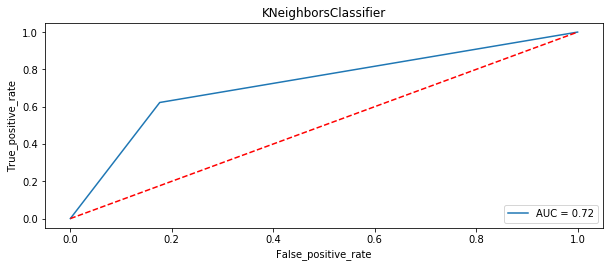

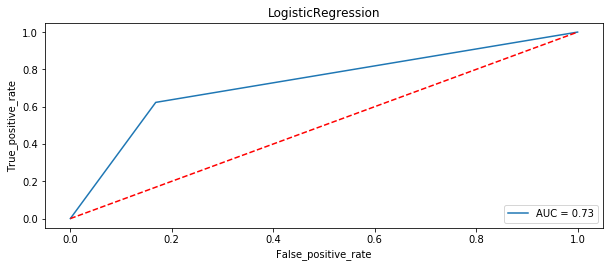

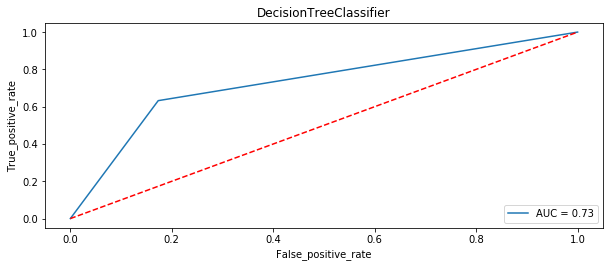

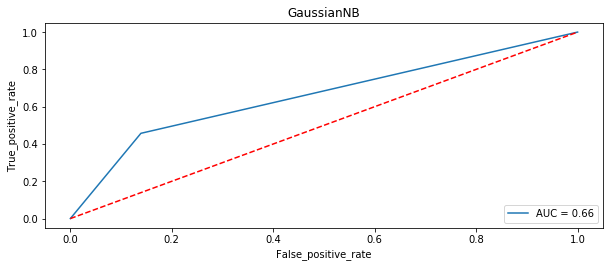

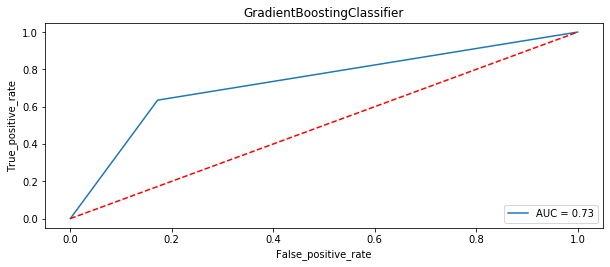

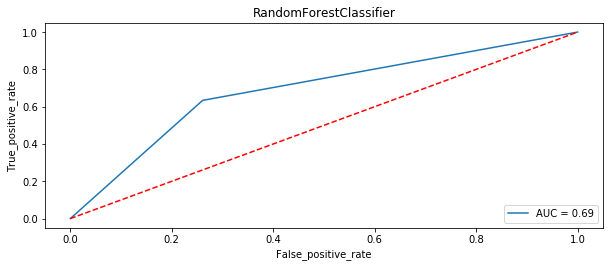

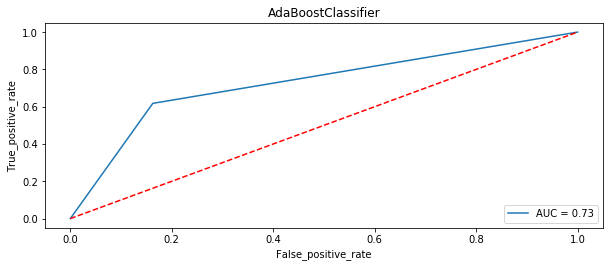

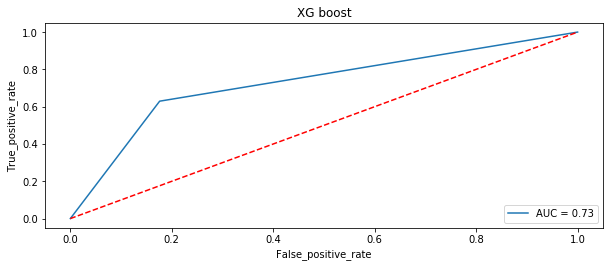

In [46]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [47]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,73.3258,72.7826,72.0534,72.3125
1,LogisticRegression,72.4035,73.2241,72.5637,72.7371
2,DecisionTreeClassifier,72.4354,73.4105,72.6108,72.9565
3,GaussianNB,66.0673,66.8465,66.1368,65.9038
4,GradientBoostingClassifier,72.8794,73.5969,72.7481,73.1466
5,RandomForestClassifier,87.9287,68.8972,68.1149,68.651
6,AdaBoostClassifier,72.6586,73.2732,72.6108,72.7601
7,XG boost,74.5131,73.126,72.4636,72.6718


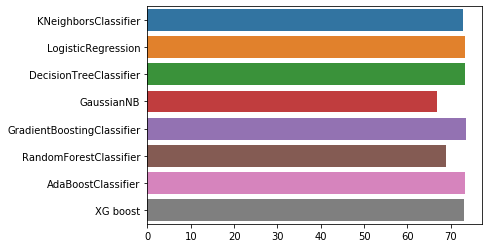

In [48]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score,)

## After all this process conclusion is that GradientBoostingClassifier is performing well in terms of Accuracy score, Cross val score and Roc_Auc score.

In [52]:
# Using DecisionTreeClassifier for final model...
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.20,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
gbcpred=gbc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,gbcpred))
print('Confusion Matrix:',confusion_matrix(y_test,gbcpred))
print('Classification Report:','\n',classification_report(y_test,gbcpred))

Accuracy Score: 0.735969387755102
Confusion Matrix: [[4416  918]
 [1773 3085]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77      5334
           1       0.77      0.64      0.70      4858

    accuracy                           0.74     10192
   macro avg       0.74      0.73      0.73     10192
weighted avg       0.74      0.74      0.73     10192



(2.0, 0.0)

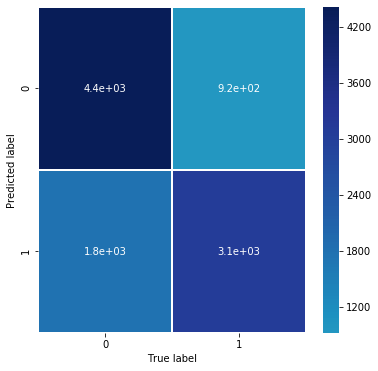

In [54]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, gbcpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

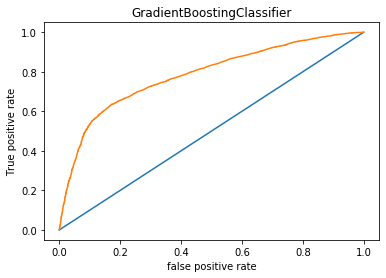

roc_auc_score =  0.7840937402894625


In [55]:
# Make predictions with probabilities
y_probs = gbc.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

In [56]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=gbcpred
test
# On the lest side values are those which are taken by machine for test...

,cardio,Predicted values
6050,0,0
62929,1,1
25278,1,0
28669,1,1
42145,0,0
...,...,...
26895,0,0
67735,1,1
50022,1,1
30102,0,0


In [57]:
# Saving the Predicted values in csv file
test.to_csv('Assignment_5_Cardiovascular.csv') 

In [59]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(gbc,'Assignment_5_Cardiovascular.pkl')

['Assignment_5_Cardiovascular.pkl']

## Conclusion:
1) gender 1 is more than gender 2.                
2) Number of counts of person having cholesterol level in ascending order: 3 > 2 > 1 where,(1: normal, 2: above normal, 3: well above normal).                     
3) Number of counts of person having glucose level in ascending order:2 > 3 > 1 where,(1: normal, 2: above normal, 3: well above normal).                   
4) Number of persons with more physical activity is more.        
5) Increasing weight leads to increase in chance of having cardiovascular disease .                   
6) As value of Systolic Blood Pressure increse, cardiovascular disease  chance increases.    
7) Persons having cholesterol of level 3(well above normal) are more prone to cardiovascular disease.     
8) Persons having level 2(above normal) and level 3(well above normal) glucose are more prone to cardiovascular disease.   
9) Persons who smoke are more prone to cardiovascular disease.     
10) Persons having less physical activity are having more risk of cardiovascular disease.      


## Steps Followed:¶           
1) Data Analysis.                
2) EDA Analysis.                           
3) Best parameters are found using GridsearchCV  and applied to models.                       
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.      
5) AUC ROC Curves are made for each model.                             
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.    
7) GradientBoostingClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.   
8) Predicted values are saved in Assignment_5_Cardiovascular.csv file.               
9) Pickle file is named with Assignment_5_Cardiovascular.pkl              